In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import geopandas as gpd
#import dask.dataframe as dd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

from xmitgcm import llcreader

## Data

In [6]:
model = llcreader.ECCOPortalLLC4320Model()
model.varnames

['Eta',
 'KPPhbl',
 'oceFWflx',
 'oceQnet',
 'oceQsw',
 'oceSflux',
 'oceTAUX',
 'oceTAUY',
 'PhiBot',
 'Salt',
 'SIarea',
 'SIheff',
 'SIhsalt',
 'SIhsnow',
 'SIuice',
 'SIvice',
 'Theta',
 'U',
 'V',
 'W']

In [30]:
ds = model.get_dataset(type="faces")
ds

<xarray.Dataset>
Dimensions:   (face: 13, i: 4320, i_g: 4320, j: 4320, j_g: 4320, k: 90, k_l: 90, k_p1: 90, k_u: 90, time: 9030)
Coordinates:
  * face      (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i         (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * i_g       (i_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j         (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j_g       (j_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * k         (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_u       (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k_l       (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k_p1      (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
    niter     (time) int64 ...
  * time      (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00
Data variables:
    Eta       (time, face, j, i) >f4 dask.

In [8]:
ds.time.values

array(['2011-09-13T00:00:00.000000000', '2011-09-13T01:00:00.000000000',
       '2011-09-13T02:00:00.000000000', ...,
       '2012-09-23T03:00:00.000000000', '2012-09-23T04:00:00.000000000',
       '2012-09-23T05:00:00.000000000'], dtype='datetime64[ns]')

In [9]:
Theta_selected = ds.isel(face=10,time=0,k=0).Theta
U_selected = ds.isel(face=10,time=0,k=0).U
V_selected = ds.isel(face=10,time=0,k=0).V

In [10]:
Eta10_t0

<xarray.DataArray 'Eta' (j: 4320, i: 4320)>
dask.array<getitem, shape=(4320, 4320), dtype=>f4, chunksize=(4320, 4320)>
Coordinates:
    face     int64 10
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
    niter    int64 ...
    time     datetime64[ns] 2011-09-13
Attributes:
    standard_name:  ETAN
    long_name:      Surface Height Anomaly
    units:          m

In [11]:
Eta10_t0.plot()

AssertionError: 

## Grid

In [85]:
from xmitgcm import open_mdsdataset

In [35]:
from spectral_analysis.common_vars.directories import DATA_FOLDER,MODEL_FOLDER,LUIGI_OUT_FOLDER
grid_path = "{}/LLC4320/grid/".format(MODEL_FOLDER)
print(grid_path)

/home/antonio/GoogleDrive/Tesis/data/model/LLC4320/grid/


In [36]:
grid_ds = open_mdsdataset(grid_path, read_grid=True, iters=None, default_dtype=np.float32, geometry='llc')
grid_ds

<xarray.Dataset>
Dimensions:  (face: 13, i: 4320, i_g: 4320, j: 4320, j_g: 4320, k: 90, k_l: 90, k_p1: 91, k_u: 90)
Coordinates:
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_u      (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89 90
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC       (face, j, i) >f4 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    YC       (face, j, i) >f4 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>
    XG      

### Lat,lon coordinates

In [37]:
LON = grid_ds.XG.isel(face=10).values
LAT = grid_ds.YG.isel(face=10).values

In [60]:
rAz = grid_ds.rAz.isel(face=10).values

In [63]:
rAz = np.rot90(rAz)

In [40]:
dx = grid_ds.dxG.isel(face=10).values
dy = grid_ds.dyG.isel(face=10).values

In [50]:
LON = np.rot90(LON)
LAT = np.rot90(LAT)
dx = np.rot90(dx)
dy = np.rot90(dy)

In [38]:
LON.shape

(4320, 4320)

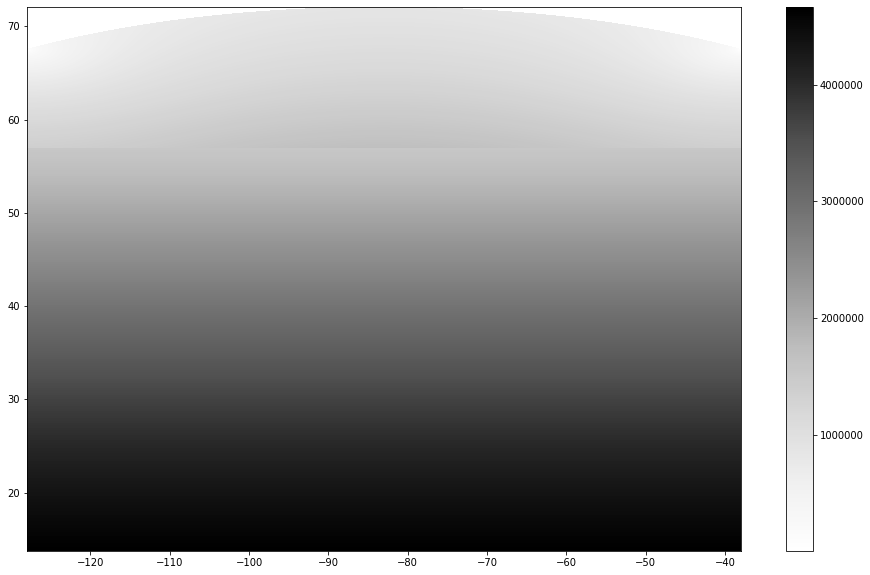

In [64]:
plt.figure(figsize=(16,10))
#plt.contour(LON,LAT,DEPTH,[0],colors='black')
_c = plt.pcolormesh(LON,LAT,rAz,cmap=plt.cm.Greys)
plt.colorbar(_c)
plt.show()

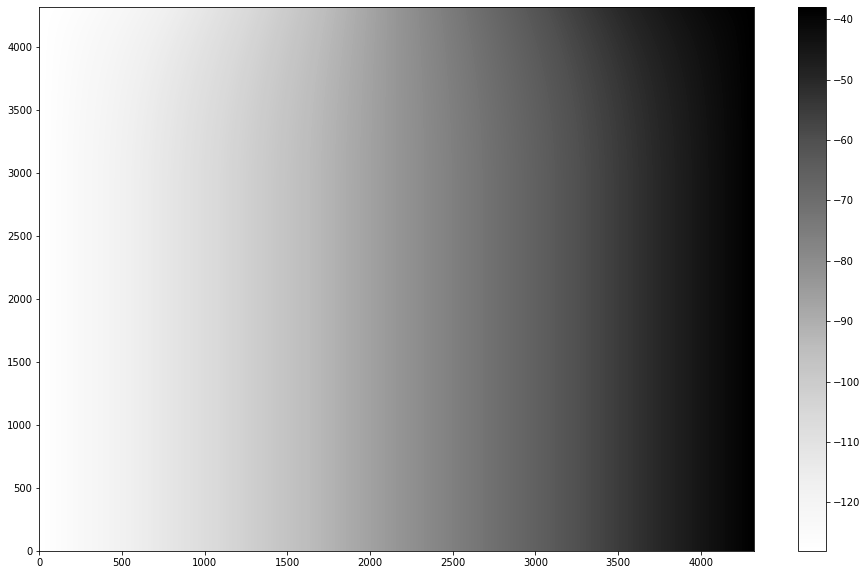

In [52]:
plt.figure(figsize=(16,10))
_c = plt.pcolormesh(LON,cmap=plt.cm.Greys)
plt.colorbar(_c)
plt.show()

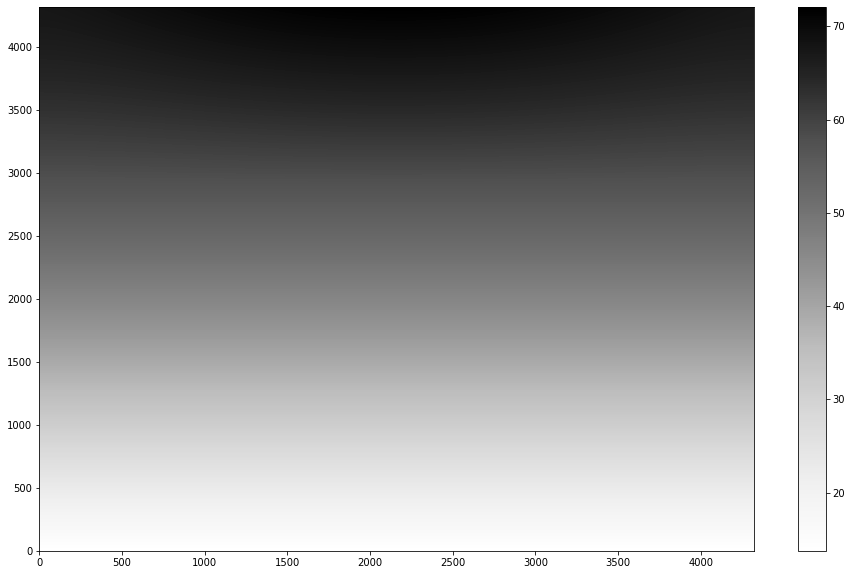

In [53]:
plt.figure(figsize=(16,10))
_c = plt.pcolormesh(LAT,cmap=plt.cm.Greys)
plt.colorbar(_c)
plt.show()

In [20]:
def find_ij_4lonlat(lon_v,lat_v,lon,lat):
    # (lon_v,lat_v): Valores de [lon,lat] a buscar
    # (lon,lat): Matrices con latitud y longitud en donde buscaremos
    # Regresa: Índices i(lon),j(lat) correspondientes al punto más cercano a (lon_v,lat_v)
    # Hacemos la búsqueda con el punto R2 = (lon-lon_v)^2 + (lat-lat_v)^2, tal que R2 sea mínimo
    R2 = np.square(lon-lon_v) + np.square(lat-lat_v)
    found = np.where(R2==np.amin(R2))
    # Para xmitgcm, los índices están invertidos: i=eje x (columnas), j=eje y (filas)
    j = found[0][0]
    i = found[1][0]
    return i,j

In [54]:
i_max,j_max = find_ij_4lonlat(LON,LAT,-110,24)
print(i_max,j_max)

864 566


In [56]:
LON[j_max,i_max],LAT[j_max,i_max]

(-110.0, 24.001942)

In [84]:
i_min,j_min = find_ij_4lonlat(LON,LAT,-115,20)
print(i_min,j_min)

624 341


In [58]:
LON[j_min,i_min],LAT[j_min,i_min]

(-115.0, 20.007841)

In [65]:
lon_ = LON[j_min:j_max,i_min:i_max]
lat_ = LAT[j_min:j_max,i_min:i_max]
raz_ = rAz[j_min:j_max,i_min:i_max]

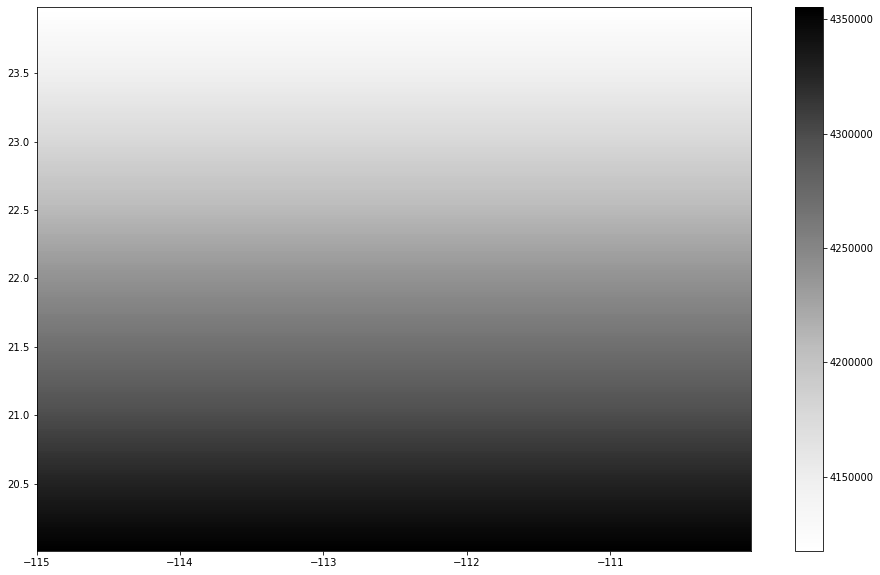

In [66]:
plt.figure(figsize=(16,10))
#plt.contour(LON,LAT,DEPTH,[0],colors='black')
_c = plt.pcolormesh(lon_,lat_,raz_,cmap=plt.cm.Greys)
plt.colorbar(_c)
plt.show()

In [68]:
# Guardarlo en archivo local
np.savez_compressed("/home/antonio/GoogleDrive/Tesis/data/model/LLC2160/grid/grid.npz", Lon=lon_,Lat=lat_,rAz=raz_)
np.savez("/home/antonio/GoogleDrive/Tesis/data/model/LLC2160/grid/test_t00003_z00.npz", Theta=Theta_saved, U=U_saved, V=V_saved)
#np.savez("/home/antonio/GoogleDrive/Tesis/data/model/LLC2160/grid/test_t0_z0.npz", Lon=lon_,Lat=lat_,rAz=raz_)

In [69]:
loaded_grid = np.load("/home/antonio/GoogleDrive/Tesis/data/model/LLC2160/grid/grid.npz")

In [70]:
lat_load = loaded_grid["Lat"]
lon_load = loaded_grid["Lon"]
raz_load = loaded_grid["rAz"]

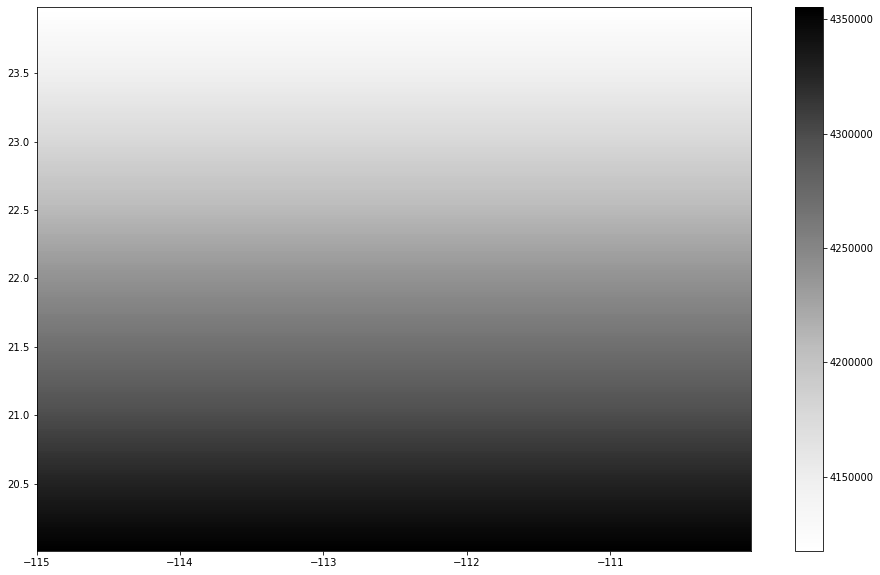

In [71]:
plt.figure(figsize=(16,10))
#plt.contour(LON,LAT,DEPTH,[0],colors='black')
_c = plt.pcolormesh(lon_load,lat_load,raz_load,cmap=plt.cm.Greys)
plt.colorbar(_c)
plt.show()

### Encontrar índice K para un Z dado

In [ ]:
# Layer thickness
dz = grid_ds.drC.isel(face=10).values

In [80]:
Z = grid_ds.Z.values
Z

array([-5.000000e-01, -1.570000e+00, -2.790000e+00, -4.185000e+00,
       -5.780000e+00, -7.595000e+00, -9.660000e+00, -1.201000e+01,
       -1.468000e+01, -1.770500e+01, -2.112500e+01, -2.499000e+01,
       -2.934500e+01, -3.424000e+01, -3.972500e+01, -4.585500e+01,
       -5.269000e+01, -6.028000e+01, -6.868500e+01, -7.796500e+01,
       -8.817500e+01, -9.937000e+01, -1.116000e+02, -1.249150e+02,
       -1.393650e+02, -1.549900e+02, -1.718250e+02, -1.899000e+02,
       -2.092350e+02, -2.298550e+02, -2.517700e+02, -2.749850e+02,
       -2.995050e+02, -3.253200e+02, -3.524200e+02, -3.807900e+02,
       -4.104100e+02, -4.412550e+02, -4.733050e+02, -5.065400e+02,
       -5.409350e+02, -5.764650e+02, -6.131100e+02, -6.508550e+02,
       -6.896850e+02, -7.295950e+02, -7.705850e+02, -8.126600e+02,
       -8.558350e+02, -9.001350e+02, -9.455950e+02, -9.922600e+02,
       -1.040180e+03, -1.089425e+03, -1.140080e+03, -1.192235e+03,
       -1.246005e+03, -1.301520e+03, -1.358920e+03, -1.418375e

In [82]:
## Para z=10 m (o lo más cercano)
k_=6

-9.66

In [ ]:
# Seleccionamos los datos para ese Z (o k)
U_sel_tk_tmp = ds.isel(time=0,k=k_,face=10).U.values

In [ ]:
## Hay que rotar

### Seleccionar tiempo por fecha, o por iteración

In [ ]:
# Fecha
sel_t = np.datetime64('2011-09-13T00:00:00')
U_sel_tk_tmp = ds.sel(time=sel_t,k=6,face=10).U.values

In [ ]:
## Iteracion
t=0
U_sel_tk_tmp = ds.isel(time=t,k=6,face=10).U.values

In [75]:
# Para cuando face>6, hay que rotar
U_sel_tk = np.rot90(U_sel_tk_tmp)

numpy.datetime64('2011-09-13T00:00:00')

### En resumen: Si ya sabemos el k, el time (iteración), y los índices (i,j):

In [ ]:
t=0
k_=6
## Para correr find_ij_4lonlat, LON y LAT también deberieron haberse rotado con np.rot90
i_max,j_max=864,566 # Alternativamente: i_max,j_max=find_ij_4lonlat(LON,LAT,-110,24) ## <-- Superior derecha
i_min,j_min=624,341 # Alternativamente: i_min,j_min=find_ij_4lonlat(LON,LAT,-115,20) ## <-- Inf. izquierda

In [ ]:
Theta_tmp = np.rot90(ds.isel(face=10,k=k_,time=t).Theta.values)
Theta_selected = Theta_tmp[j_min:j_max,i_min:i_max]

In [ ]:
### O con time(fecha)
Theta_tmp = np.rot90(ds.sel(face=10,k=k_,time=sel_t).Theta.values)
Theta_selected = Theta_tmp[j_min:j_max,i_min:i_max]

In [ ]:
## Guardamos
# Guardarlo en archivo local
np.savez_compressed("/home/antonio/GoogleDrive/Tesis/data/model/LLC2160/grid/vars_t0_k6.npz", T=Theta_selected)

In [ ]:
# Y leemos
data_loaded = np.load("/home/antonio/GoogleDrive/Tesis/data/model/LLC2160/grid/vars_t0_k6.npz")
Theta_loaded = data_loaded["T"]

## TODO:
- Enviar este notebook 
- Compartir link a GDrive con los datos de malla
- Compartir notebook de Colab